### data-set source --

https://raw.githubusercontent.com/upxacademy/ML_with_Python/master/Datasets/bikeshare.csv

    
datetime - hourly date + timestamp<br/>
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br/>
holiday - whether the day is considered a holiday<br/>
workingday - whether the day is neither a weekend nor holiday<br/>
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br/>
temp - temperature in Celsius<br/>
atemp - "feels like" temperature in Celsius<br/>
humidity - relative humidity<br/>
windspeed - wind speed<br/>
casual - number of non-registered user rentals initiated<br/>
registered - number of registered user rentals initiated<br/>
count - number of total rentals<br/>

In [1]:
import numpy as np
import pandas as pd

In [52]:
bike_data = pd.read_csv('bikeshare.csv')

In [53]:
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [54]:
bike_data = bike_data.set_index('datetime') ## using index as date-hour instead of default numeric index
bike_data.rename(columns ={'count':'total'}, inplace=True) ## rename column to easy understand
bike_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [55]:
bike_data.shape ## shape of data-set

(10886, 11)

#### data-set having 11 columns and 10886 sample records 

### checking if data-set is having any null data 

In [6]:
bike_data.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
total         0
dtype: int64

In [7]:
bike_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
bike_data_corr = bike_data.corr()
bike_data_corr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


## Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

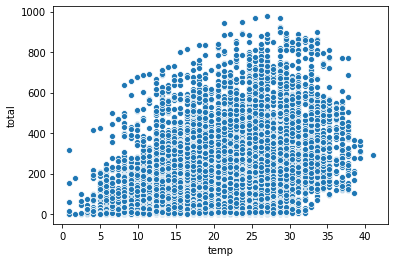

In [10]:
sns.scatterplot('temp','total', data = bike_data)
plt.show()

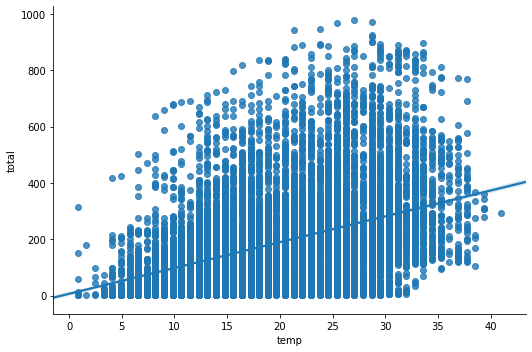

In [14]:
sns.lmplot(x='temp', y='total', data=bike_data,aspect=1.5 ,scatter={'alpha':0.3})
plt.show()

In [ ]:
bike_data.plot.bar(x='temp',y='total')
plt.show()

## Building a Linear regression model to predict number of bikes rented in an hour

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
feature_col = ['temp'] ## input-variable/predictor
X = bike_data[feature_col]
# print('input data-set\n', X.head())
print(X.head())

                     temp
datetime                 
2011-01-01 00:00:00  9.84
2011-01-01 01:00:00  9.02
2011-01-01 02:00:00  9.02
2011-01-01 03:00:00  9.84
2011-01-01 04:00:00  9.84


In [17]:
y= bike_data.total ## Output variable
y.head()

datetime
2011-01-01 00:00:00    16
2011-01-01 01:00:00    40
2011-01-01 02:00:00    32
2011-01-01 03:00:00    13
2011-01-01 04:00:00     1
Name: total, dtype: int64

In [18]:
## Initialize linearregression model
linearregression = LinearRegression()

In [19]:
## fit the best-file line for using given feature, predictor
linearregression.fit(X,y)

print('coeficient value::',linearregression.coef_) ## 
print('intercept  value :', linearregression.intercept_)

coeficient value:: [9.17054048]
intercept  value : 6.046212959616781


## how above values are represented in linear regression best-file line model 

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)


So here, 
- $\beta_0$ is linearregression.intercept_ value: **6.046212959616781**
- $\beta_1$ is linearregression.coef_ value is : **[9.17054048]**

### Model prediction

In [20]:
# linearregression.predict(25)

linearregression.predict(np.array( [[25]] )) ## Since input-variable is 2-D array as per method

array([235.309725])

### using different scale of predcitor .. here case taking F

In [21]:
## creating new column as temp_f
bike_data['temp_f'] = bike_data.temp *1.8 + 32
bike_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_f
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


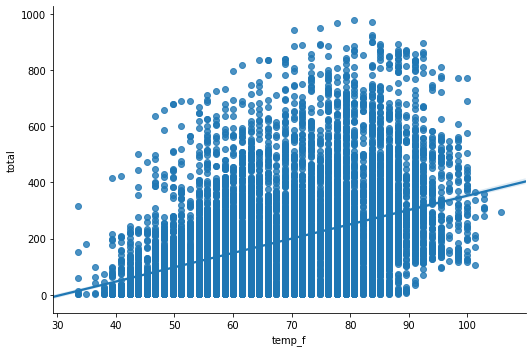

In [22]:
sns.lmplot(x='temp_f', y='total', data=bike_data,aspect=1.5 ,scatter={'alpha':0.3})
plt.show()

### it will show similar outpur result

In [23]:
## creating model using temp_f & total
feature_cols = ['temp_f']
X = bike_data[feature_cols]
y = bike_data.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

-156.98561782129445
[5.09474471]


In [24]:
## predicting value 
linreg.predict(np.array([[25*1.8 +32]])) ## using 25 degree celcius as farenhite

array([235.309725])

### output will remain same as relation between predictor/target will not change, only the cofficient value will change 

In [51]:
## Now droping the added column
bike_data.drop('temp_f',axis=1, inplace=True)
bike_data.head(2)

KeyError: "['temp_f'] not found in axis"

## Visulation of data using multiple precdictor

In [27]:
# explore more features
feature_cols = ['temp', 'season', 'weather', 'humidity']

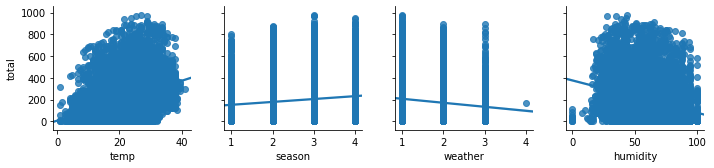

In [28]:
# multiple scatter plots in Seaborn
sns.pairplot(bike_data, x_vars=feature_cols, y_vars='total', kind='reg')

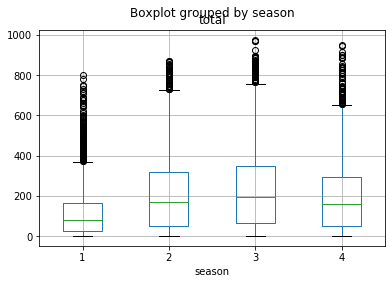

In [30]:
# box plot of rentals, grouped by season
bike_data.boxplot(column='total', by='season')

### so here, with the value given to season with numeric, is not correct as giviing more imprtantce on other by using numeric value

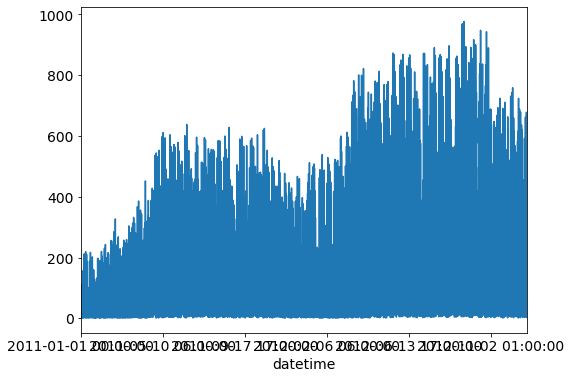

In [34]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
bike_data['total'].plot()
plt.show()

## Adding more features while buildnig model

In [35]:
feature_cols = ['temp', 'season', 'weather', 'humidity']

In [36]:
X= bike_data[feature_cols]
y= bike_data.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

159.52068786129817
[ 7.86482499 22.53875753  6.67030204 -3.11887338]


In [37]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('temp', 7.864824992477439),
 ('season', 22.53875753246676),
 ('weather', 6.670302035923719),
 ('humidity', -3.118873382396501)]

## it gives each cofficient value ( $\beta\$) w.r.t to predictor 

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **temperature** is associated with a **rental increase of 7.86 bikes**.
- Holding all other features fixed, a 1 unit increase in **season** is associated with a **rental increase of 22.5 bikes**.
- Holding all other features fixed, a 1 unit increase in **weather** is associated with a **rental increase of 6.67 bikes**.
- Holding all other features fixed, a 1 unit increase in **humidity** is associated with a **rental decrease of 3.12 bikes**.

Does anything look incorrect?

## here we can think that upto to some extent when temp & humidiity increased , total bikes will icnrease/decrease,
but for seaon/weather since given value to them, it is not always the case

## Handling categorical features  <a id='catfeatures'>

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 
- 1 = spring, 
- 2 = summer, 
- 3 = fall, and 
- 4 = winter

because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [56]:
## creating dummy variable

season_dummy = pd.get_dummies(bike_data.season, prefix='season') ## creating dummy variable

## taking random 5 sample-data
season_dummy.sample(n=5, random_state =2) ##  since want same outout so taking random_state

,season_1,season_2,season_3,season_4
datetime,,,,
2011-02-04 09:00:00,1,0,0,0
2011-04-08 10:00:00,0,1,0,0
2011-09-07 09:00:00,0,0,1,0
2011-04-04 01:00:00,0,1,0,0
2012-10-17 13:00:00,0,0,0,1


## so when having value as '1' that season is so 
- incase season_1 value as'1' mean seaon is 'spring'
- incase season_2 value as'1' mean seaon is 'summer'

### Generally we need 1 less dummy_variable (n-1), as if all 3 dummy variable have value as '0'
means, 4th value is present 

In [57]:
season_dummy.drop(season_dummy.columns[0], axis =1, inplace=True)
season_dummy.head()

,season_2,season_3,season_4
datetime,,,
2011-01-01 00:00:00,0,0,0
2011-01-01 01:00:00,0,0,0
2011-01-01 02:00:00,0,0,0
2011-01-01 03:00:00,0,0,0
2011-01-01 04:00:00,0,0,0


### so it has dropped column 1, we can drop any column, it will only impact cofficient value for model, but not anything else

In [58]:
## adding seaon_dummy column to bike_data set
bike_data = pd.concat([bike_data,season_dummy], axis=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-02-04 09:00:00,1,0,1,2,6.56,9.090,80,8.9981,3,124,127,0,0,0
2011-04-08 10:00:00,2,0,1,2,14.76,16.665,71,19.0012,10,63,73,1,0,0
2011-09-07 09:00:00,3,0,1,3,24.60,27.275,88,8.9981,14,176,190,0,1,0
2011-04-04 01:00:00,2,0,1,1,16.40,20.455,56,23.9994,7,4,11,1,0,0
2012-10-17 13:00:00,4,0,1,2,22.14,25.760,49,8.9981,73,237,310,0,0,1


In [59]:
bike_data.sample(n=5, random_state =2 ) ## will print random 5 data-set records 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-02-04 09:00:00,1,0,1,2,6.56,9.090,80,8.9981,3,124,127,0,0,0
2011-04-08 10:00:00,2,0,1,2,14.76,16.665,71,19.0012,10,63,73,1,0,0
2011-09-07 09:00:00,3,0,1,3,24.60,27.275,88,8.9981,14,176,190,0,1,0
2011-04-04 01:00:00,2,0,1,1,16.40,20.455,56,23.9994,7,4,11,1,0,0
2012-10-17 13:00:00,4,0,1,2,22.14,25.760,49,8.9981,73,237,310,0,0,1


### building model using these dummy season and other features 

In [60]:
# include dummy variables for season in the model
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity'] ## not taking weather as that is also similar to season feature, need to use dummy variable
X = bike_data[feature_cols]
y = bike_data.total
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('temp', 11.186405863575784),
 ('season_2', -3.3905430997179598),
 ('season_3', -41.73686071317068),
 ('season_4', 64.41596146824214),
 ('humidity', -2.819481636259646)]

### these cofficient are relative to 'spring since season_1 has been dropped'

How do we interpret the season coefficients? They are **measured against the baseline (spring)**:

- Holding all other features fixed, **summer** is associated with a **rental decrease of 3.39 bikes** compared to the spring.
- Holding all other features fixed, **fall** is associated with a **rental decrease of 41.7 bikes** compared to the spring.
- Holding all other features fixed, **winter** is associated with a **rental increase of 64.4 bikes** compared to the spring.

Would it matter if we changed which season was defined as the baseline?

- No, it would simply change our **interpretation** of the coefficients.

**Important:** Dummy encoding is relevant for all machine learning models, not just linear regression models.

In [62]:
bike_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0,0,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0,0,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0,0,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0,0,0


### now lets predict using above model .. i.e taking 1 row record values

In [79]:
x_p = [9.84,0,0,0,81]

print('y_actual: ', bike_data.total[0])
print('y_predicted : ',linreg.predict([x_p])[0] )

y_actual:  16
y_predicted :  16.599047519026072
